https://matplotlib.org/stable/tutorials/introductory/usage.html

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

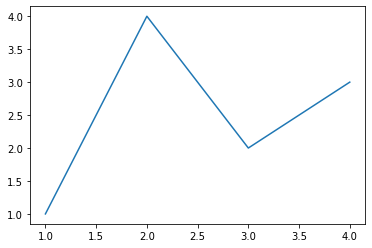

In [2]:
# matplotlib 기본 생성

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

<h1>Components of a Matplotlib Figure.</h1>
<img src="img/0_basic_PartsOfAFigure.png" width="600" height="600" align="left">

<h1>Parts of a Figure</h1>

<h3>Figure</h3><br>
하나의 객체 전체를 아우름. Axes, titles, figure legends, subfigures 등의 모든 항목들을 아우르는 단위

In [40]:
# create an empty figure with no Axes
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

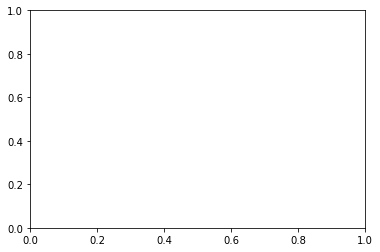

In [52]:
# create a figure with a single Axes
fig, ax = plt.subplots()  # a figure with a single Axes

fig, ax  # output을 보면 첫째 인자는 figure을 반환하고, 두번째 인자는 subplot의 axes를 반환함

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

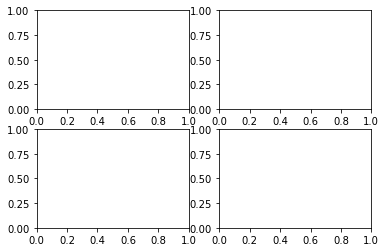

In [55]:
# a figure with a 2x2 grid of Axes
fig, axs = plt.subplots(2, 2)
fig, axs  # output을 보면 첫째 인자는 figure을 반환하고, 두번째 인자는 subplot의 axes 4개를 반환함

<h3>Axes</h3><br>
<font color="red">Axes</font>는 Fugure에 부속된 것으로, 시각화할 영역(region)을 지칭한다.<br>
하나의 <font color="red">Axes는 고유의 title(set_title()), x-label(set_xlabel()), y-label(set_ylabel())</font>을 가진다.<br>
일반적인 2D plortting의 경우, <font color="red">하나의 "Axes"는 두 개의 "Axis(축)"을 보유</font>한다.<br>
하나의 <font color="red">Axis</font> 객체는 ticks와 tick label 정보를 Axes에게 전달한다.

<h3>Axis</h3><br>
Axis는 tick(눈금)의 단위와 limit, 그리고 tick label 정보를 생성한다.<br>
tick 위치는 <font color=red>Locater 객체</font>를 통해 결정되며, tick label은 <font color=red>Formatter 객체</font>로 결정된다.<br>
이 Locater 객체와 Formatter 객체를 조합해서 Axes의 tick을 매우 미세하게 설정할 수 있다.

<h1>Types of inputs to plotting functions</h1>

<font color=red>Input data 형태는 numpy.array or numpy.ma.masked_array, numpy.asarray로 한정된다.</font><br>
Pandas 등 "array-like" classes들도 사용 가능하나, 의도된 대로 plotting되지 않을 수 있으므로, 무조건 형변환 후 사용한다.





In [60]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

Text(0, 0.5, 'entry b')

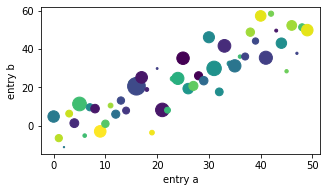

In [67]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

<h1>Coding styles</h1>

<h3>방법 1: The object-oriented: 객체지향 - <font color=red>권장됨</font></h3><br>
명시적으로 Figure과 Axes를 생성한 후, 매서드 call을 통해 시각화하는 방식.

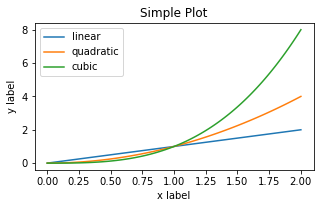

In [73]:
# example
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

<h3>방법 2: The pyplot interfaces - <font color=red>신속한 작업</font></h3><br>
pyplot function을 통해 자동적으로 Figure과 Axed 생성 후 관리. pyplot을 통해서 시각화하는 방식.

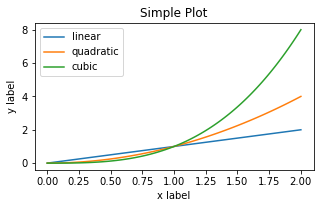

In [74]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7))
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

<h3>Making a helper functions</h3>

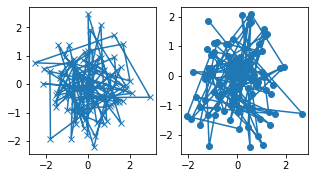

In [75]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

<h1>Others</h1>

<h3>Additional Axis objects</h3><br>
방법 1 : twinx(), twiny()<br>
방법 2 : secondary_xaxis(), secondary_yaxis()

Text(0.5, 0, 'Angle [rad]')

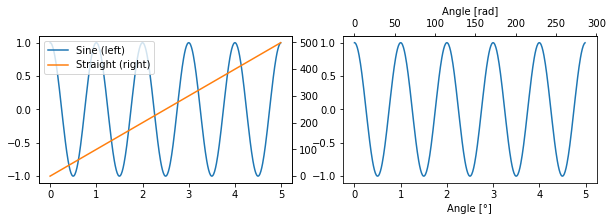

In [11]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 2.7))
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()  # ax1(죄측 axes의 twin 생성. axes 아님 axis임.)
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [°]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [rad]')

<h3>Annotations</h3>

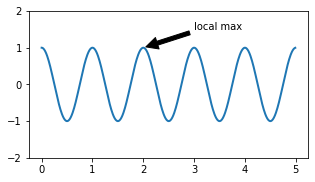

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);